<a href="https://colab.research.google.com/github/pranay4712/datascience/blob/main/Assignment_04_(simple_linear_regression)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_profiling
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 26.8 MB/s 


In [ ]:
import pandas_profiling as pp
import sweetviz as sv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy as sp
import statsmodels.api as sm
import numpy as np

1) Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [ ]:
deltime=pd.read_csv('delivery_time.csv')

In [ ]:
deltime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
deltime.describe

<bound method NDFrame.describe of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

C:\Users\Mayekar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

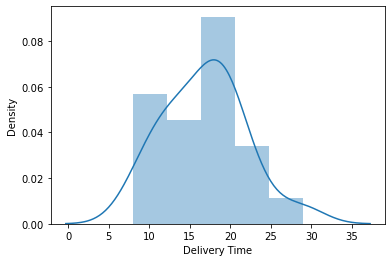

In [ ]:
sns.distplot(deltime['Delivery Time'])

C:\Users\Mayekar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

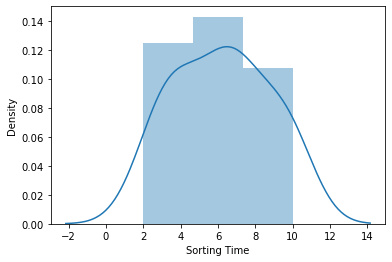

In [ ]:
sns.distplot(deltime['Sorting Time'])

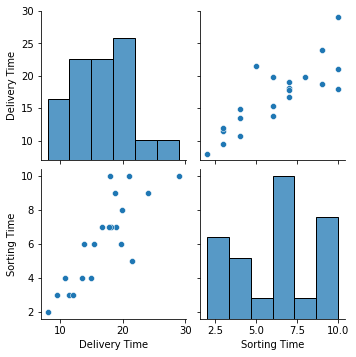

In [ ]:
sns.pairplot(deltime)

In [ ]:
dtime=deltime['Delivery Time'].mean()

In [ ]:
dtime

16.79095238095238

In [ ]:
stime=deltime['Sorting Time'].mean()

In [ ]:
stime

6.190476190476191

In [ ]:
EDA_report=pp.ProfileReport(deltime)

In [ ]:
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
deltime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
data1=deltime

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

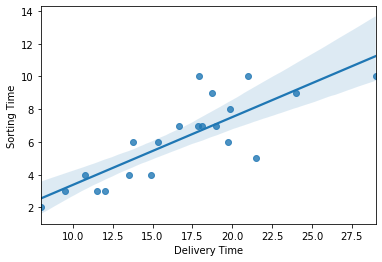

In [ ]:
sns.regplot(x='Delivery Time',y='Sorting Time',data=data1)

In [ ]:
data2=data1.rename({'Delivery Time':'Delivery'},axis=1)

In [ ]:
data2

,Delivery,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data3=data2.rename({'Sorting Time':'Sorting'},axis=1)

In [ ]:
data3

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
model1=smf.ols('Delivery~Sorting',data=data3).fit()

In [ ]:
model1

In [ ]:
print(model1.rsquared)

0.6822714748417231


In [ ]:
print(model1.pvalues)

Intercept    0.001147
Sorting      0.000004
dtype: float64


In [ ]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

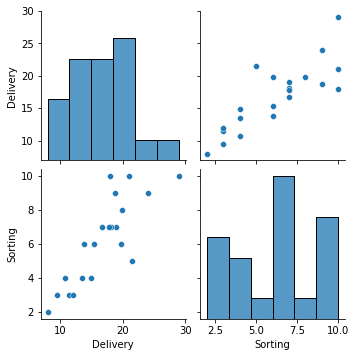

In [ ]:
sns.pairplot(data3)

In [ ]:
data3.isna().sum()

Delivery    0
Sorting     0
dtype: int64

In [ ]:
#preparing a model
Model1=smf.ols('Delivery~Sorting',data=data3).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        12:01:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#finding coefficients
model1.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [ ]:
#finding pvalue and tvalue
print(model1.tvalues,model1.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [ ]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

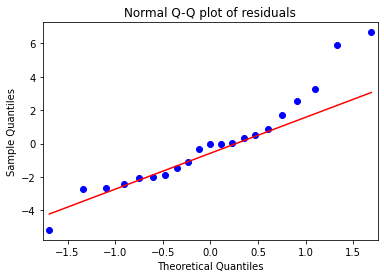

In [ ]:
#residual analysis and Q-Q pot
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
#giving residuals
res=model1.resid

In [ ]:
res

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
model1.fittedvalues #nothing but the y hat or predicted values

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
#residual plot for homoscedasticity

In [ ]:
def standarized_value(vals):
    return(vals-vals.mean())/vals.std() #user defined formula for finding standardized values

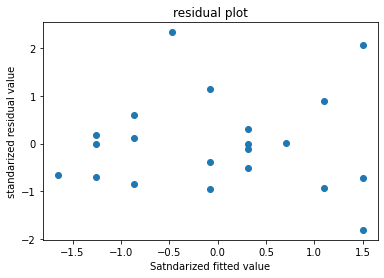

In [ ]:
plt.scatter(standarized_value(model1.fittedvalues),
           standarized_value(model1.resid))
plt.title('residual plot')
plt.xlabel('Satndarized fitted value')
plt.ylabel('standarized residual value')
plt.show()

In [ ]:
#detecting influencer outliers
#cooks distance

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

In [ ]:
c

array([5.65174628e-02, 6.05802657e-04, 3.28610455e-02, 5.27064095e-02,
       4.62053041e-01, 3.89480081e-03, 2.60419093e-03, 3.96028930e-02,
       3.51953954e-01, 5.67854347e-02, 1.49639848e-05, 3.46421730e-02,
       7.12499306e-03, 8.53239427e-06, 2.40503559e-03, 1.69949775e-02,
       2.28073073e-02, 8.58728156e-07, 5.65138719e-02, 2.98356431e-04,
       1.70820972e-01])

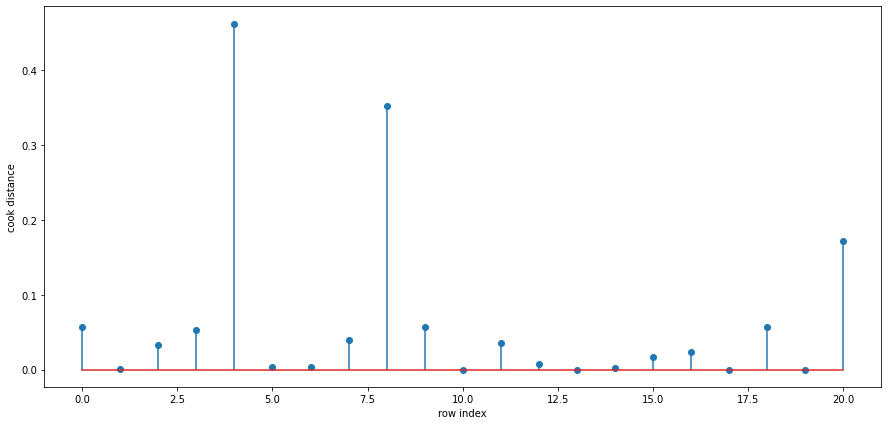

In [ ]:
import numpy as np
fig=plt.subplots(figsize=(15,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cook distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

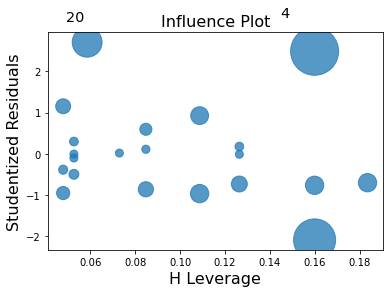

In [ ]:
#high influence point
influence_plot(model1,figsize=(15,15))
plt.show()

In [ ]:
#predict for 9,5,3 sorting
data=pd.Series([9,5,3])

In [ ]:
data_pred=pd.DataFrame(data,columns=['Sorting'])

In [ ]:
model1.predict(data_pred)

0    21.423913
1    14.827833
2    11.529794
dtype: float64

In [ ]:
#with respect to sorting we build a model for prediction of Delivery Time with respect to Sorting Time.

In [ ]:
#comparing sqrt (delivery time)~sorting time

In [ ]:
model2=smf.ols('np.sqrt(Delivery)~Sorting', data=data3).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.sqrt(Delivery)   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.00e-06
Time:                        12:46:05   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
Sorting        0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

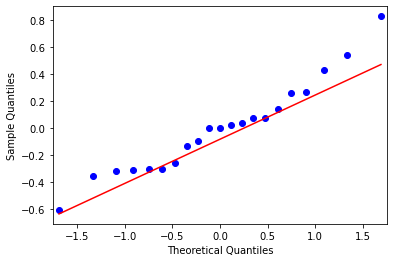

In [ ]:
qqplot=sm.qqplot(model2.resid,line='q')

In [ ]:
model2.predict(data_pred)

0    4.632417
1    3.805890
2    3.392626
dtype: float64

In [ ]:
#comparing log (delivery time)~sorting time

In [ ]:
model3=smf.ols('np.log(Delivery)~Sorting', data=data3).fit()

In [ ]:
model3.summary() # r square havent increase more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        12:47:08   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sorting        0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4=smf.ols('Delivery~np.log(Sorting)', data=data3).fit()

In [ ]:
model4.summary() # not acceptable r square decreases.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        12:47:37   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4.predict(data_pred)

0    21.030094
1    15.714496
2    11.094889
dtype: float64

Q.2 Salary_hike -> Build a prediction model for Salary_hike.
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
Salary=pd.read_csv('Salary_data.csv')

In [ ]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
EDA_report=pp.ProfileReport(Salary)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Mayekar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

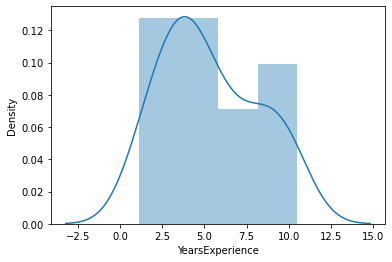

In [ ]:
sns.distplot(Salary['YearsExperience'])

C:\Users\Mayekar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

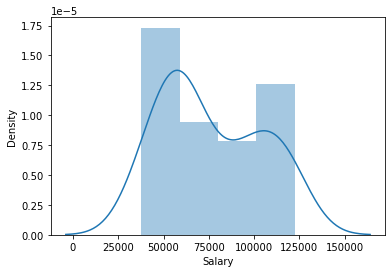

In [ ]:
sns.distplot(Salary['Salary'])

In [ ]:
#change column name
Salary1=salary.rename({'YearsExperience':'Yexp'},axis=1)

In [ ]:
Salary1

,Yexp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
Model=smf.ols("Salary~Yexp",data=Salary1).fit()

In [ ]:
Model.params

Intercept    25792.200199
Yexp          9449.962321
dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Yexp'>

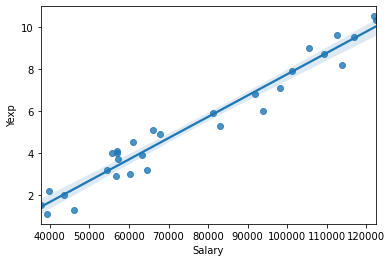

In [ ]:
sns.regplot(x="Salary",y="Yexp",data=Salary1)

In [ ]:
print(Model.tvalues)

Intercept    11.346940
Yexp         24.950094
dtype: float64


In [ ]:
print(Model.pvalues)

Intercept    5.511950e-12
Yexp         1.143068e-20
dtype: float64


In [ ]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        12:51:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Yexp        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Prediction for new data data point

In [ ]:
data=pd.Series([9,6,4])

In [ ]:
data_pred=pd.DataFrame(data,columns=['Yexp'])

In [ ]:
Model.predict(data_pred)

0    110841.861092
1     82491.974127
2     63592.049484
dtype: float64

In [ ]:
#here reult of salary hike as per model.

In [ ]:
# Tranforming variable for accuracy

In [ ]:
Model2=smf.ols('np.sqrt(Salary)~(Yexp)',data=Salary1).fit()

In [ ]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           9.78e-20
Time:                        12:54:10   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
Yexp          17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Model2.predict(data_pred)

0    334.209010
1    283.039414
2    248.926350
dtype: float64

In [ ]:
Model3=smf.ols('np.log(Salary)~(Yexp)',data=Salary1).fit()

In [ ]:
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           7.03e-18
Time:                        12:54:51   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Yexp           0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Model3.predict(data_pred)

0    11.636478
1    11.260119
2    11.009213
dtype: float64

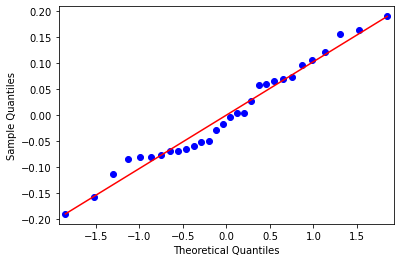

In [ ]:
qqplot=sm.qqplot(Model3.resid,line='q')